<a href="https://colab.research.google.com/github/jefferson-spec/jeeh_data_science/blob/master/Analise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ERROR! Session/line number was not unique in database. History logging moved to new session 66


In [0]:
# importação datasets
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science com mario filho/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science com mario filho/test.csv')

In [0]:
def transformar_sexo(valor):
  if valor == 'female':
    return 1
  else:
    return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario','Age']

X = train[variaveis].fillna(-1)
y = train['Survived']



In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Análise de Erro

In [0]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_test in kf.split(X):
  print('Treino:', linhas_treino.shape[0])
  print('Test', linhas_test.shape[0])
  

  X_treino, X_test = X.iloc[linhas_treino], X.iloc[linhas_test]
  y_treino, y_test = y.iloc[linhas_treino], y.iloc[linhas_test]
  
  mdl = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
  mdl.fit(X_treino, y_treino)

  p = mdl.predict(X_test)

  acc = np.mean(y_test == p)
  resultados.append(acc)
  print('Acc:', acc)
  print()


  #print(X_treino.head())
  #print()

Treino: 445
Test 446
Acc: 0.7511210762331838

Treino: 446
Test 445
Acc: 0.7617977528089888

Treino: 445
Test 446
Acc: 0.7533632286995515

Treino: 446
Test 445
Acc: 0.7595505617977528

Treino: 445
Test 446
Acc: 0.7690582959641256

Treino: 446
Test 445
Acc: 0.7573033707865169

Treino: 445
Test 446
Acc: 0.7399103139013453

Treino: 446
Test 445
Acc: 0.7595505617977528

Treino: 445
Test 446
Acc: 0.7354260089686099

Treino: 446
Test 445
Acc: 0.797752808988764

Treino: 445
Test 446
Acc: 0.7690582959641256

Treino: 446
Test 445
Acc: 0.7640449438202247

Treino: 445
Test 446
Acc: 0.7757847533632287

Treino: 446
Test 445
Acc: 0.7573033707865169

Treino: 445
Test 446
Acc: 0.7556053811659192

Treino: 446
Test 445
Acc: 0.7640449438202247

Treino: 445
Test 446
Acc: 0.7443946188340808

Treino: 446
Test 445
Acc: 0.7595505617977528

Treino: 445
Test 446
Acc: 0.7533632286995515

Treino: 446
Test 445
Acc: 0.7640449438202247



In [0]:
X_valid_check = train.iloc[linhas_test].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [0]:
X_valid_check.shape

(445, 14)

In [0]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId','Pclass','Name',	'Sex',	'Age',	'SibSp',
               'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked',	'Sex_binario','p','Survived']]

In [0]:
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
24,25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,1,1,0
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,0,1


In [0]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [0]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,1,1,0
404,405,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,1,1,0
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,1,1,0


In [0]:
homens.sort_values("Survived")

ERROR! Session/line number was not unique in database. History logging moved to new session 67


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
59,60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0,1,0
771,772,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,0,1,0
684,685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0,1,0
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,1,0
694,695,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,0,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
599,600,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,0,0,1
604,605,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,0,0,1
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,0,0,1
622,623,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C,0,0,1


# **Novas Variaveis**

In [0]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)




In [0]:
variaveis = ['Sex_binario', 'Age','Pclass', 'SibSp', 'Parch', 'Fare','Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs','Nome_contem_Master','Nome_contem_Col','Nome_contem_Major',]

X = train[variaveis].fillna(-1)
y = train['Survived']

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_test in kf.split(X):
  print('Treino:',linhas_treino.shape[0])
  print('Test',linhas_test.shape[0])
  

  X_treino, X_test = X.iloc[linhas_treino], X.iloc[linhas_test]
  y_treino, y_test = y.iloc[linhas_treino], y.iloc[linhas_test]
  
  #mdl = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
  mdl = LogisticRegression()

  mdl.fit(X_treino, y_treino)

  p = mdl.predict(X_test)

  acc = np.mean(y_test == p)
  resultados2.append(acc)
  print('Acc:', acc)
  print()


    #print(X_treino.head())
    #print()

Treino: 445
Test 446
Acc: 0.8295964125560538

Treino: 446
Test 445
Acc: 0.797752808988764

Treino: 445
Test 446
Acc: 0.8161434977578476

Treino: 446
Test 445
Acc: 0.8089887640449438

Treino: 445
Test 446
Acc: 0.8183856502242153

Treino: 446
Test 445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acc: 0.8157303370786517

Treino: 445
Test 446
Acc: 0.804932735426009

Treino: 446
Test 445
Acc: 0.8179775280898877

Treino: 445
Test 446
Acc: 0.8228699551569507

Treino: 446
Test 445
Acc: 0.8157303370786517

Treino: 445
Test 446
Acc: 0.8228699551569507

Treino: 446
Test 445
Acc: 0.8112359550561797

Treino: 445
Test 446
Acc: 0.8408071748878924

Treino: 446
Test 445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acc: 0.8089887640449438

Treino: 445
Test 446
Acc: 0.8116591928251121

Treino: 446
Test 445
Acc: 0.8134831460674158

Treino: 445
Test 446
Acc: 0.8363228699551569

Treino: 446
Test 445
Acc: 0.8134831460674158

Treino: 445
Test 446
Acc: 0.8318385650224215

Treino: 446
Test 445
Acc: 0.8202247191011236



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
np.mean(resultados2)

0.8179510757293293

(array([1., 1., 2., 4., 5., 3., 0., 2., 1., 1.]),
 array([0.79775281, 0.80205825, 0.80636368, 0.81066912, 0.81497456,
        0.81927999, 0.82358543, 0.82789087, 0.8321963 , 0.83650174,
        0.84080717]),
 <a list of 10 Patch objects>)

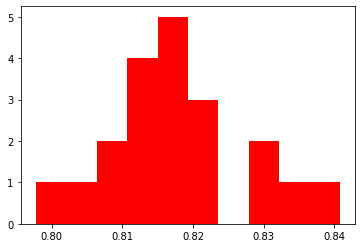

In [0]:
pylab.hist(resultados2, color='red')

In [0]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#tes['Embarked_Q'] = (test2['Embarked'] == "Q").astype(int)

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr').astype(int)

#mdl = RandomForestClassifier(n_estimators=100,n_jobs=1,random_state=0)
mdl = LogisticRegression()
mdl.fit(X,y)

p = mdl.predict(test[variaveis].fillna(-1))


ERROR! Session/line number was not unique in database. History logging moved to new session 71


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major
0,0,34.5,3,0,0,7.8292,0,0,1,0,0,0,0,0
1,1,47.0,3,1,0,7.0000,1,0,1,0,1,0,0,0
2,0,62.0,2,0,0,9.6875,0,0,1,0,0,0,0,0
3,0,27.0,3,0,0,8.6625,1,0,1,0,0,0,0,0
4,1,22.0,3,1,1,12.2875,1,0,1,0,1,0,0,0


In [0]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [0]:
sub.to_csv('modelo5.csv', header=True)

In [0]:
!head -n10 modelo5.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
